In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/clean_data/merged_df.csv')

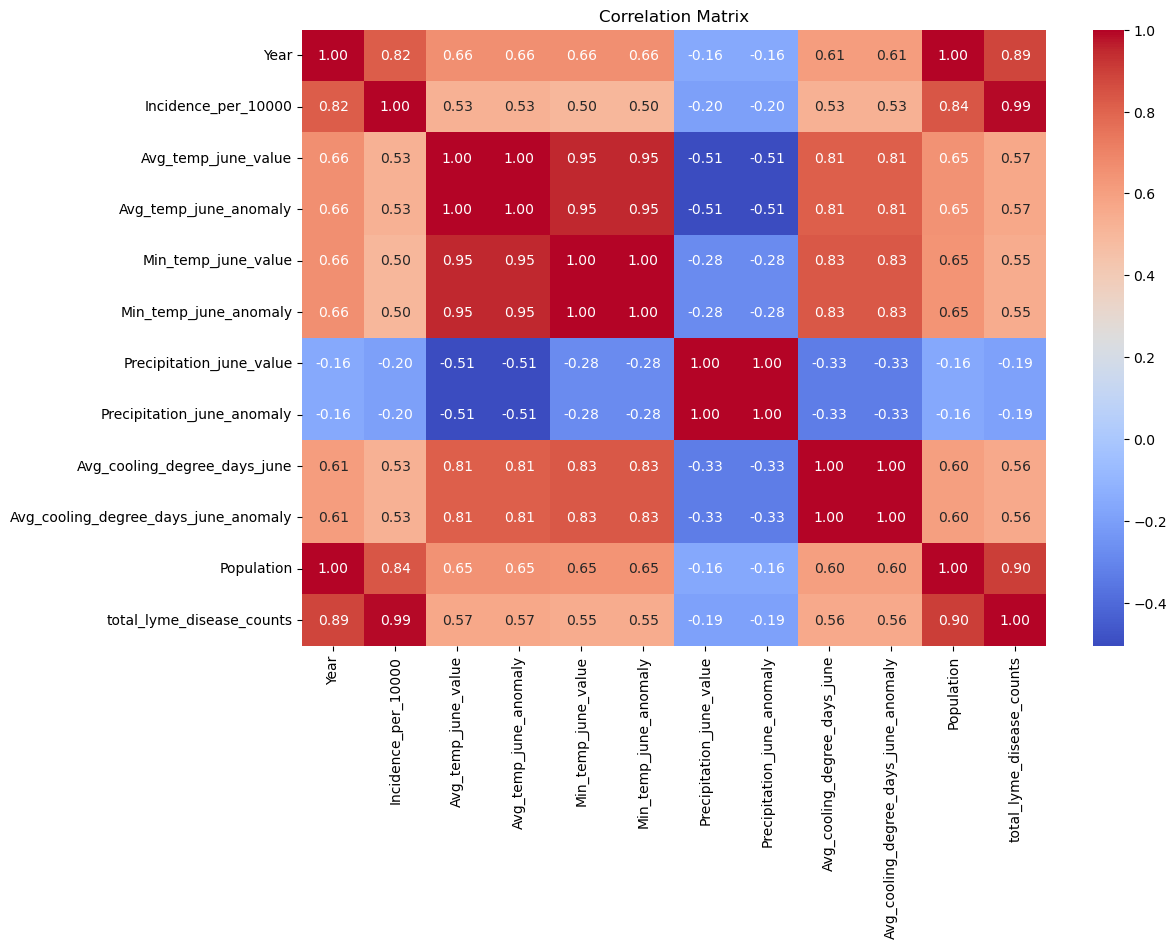

In [3]:
# correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

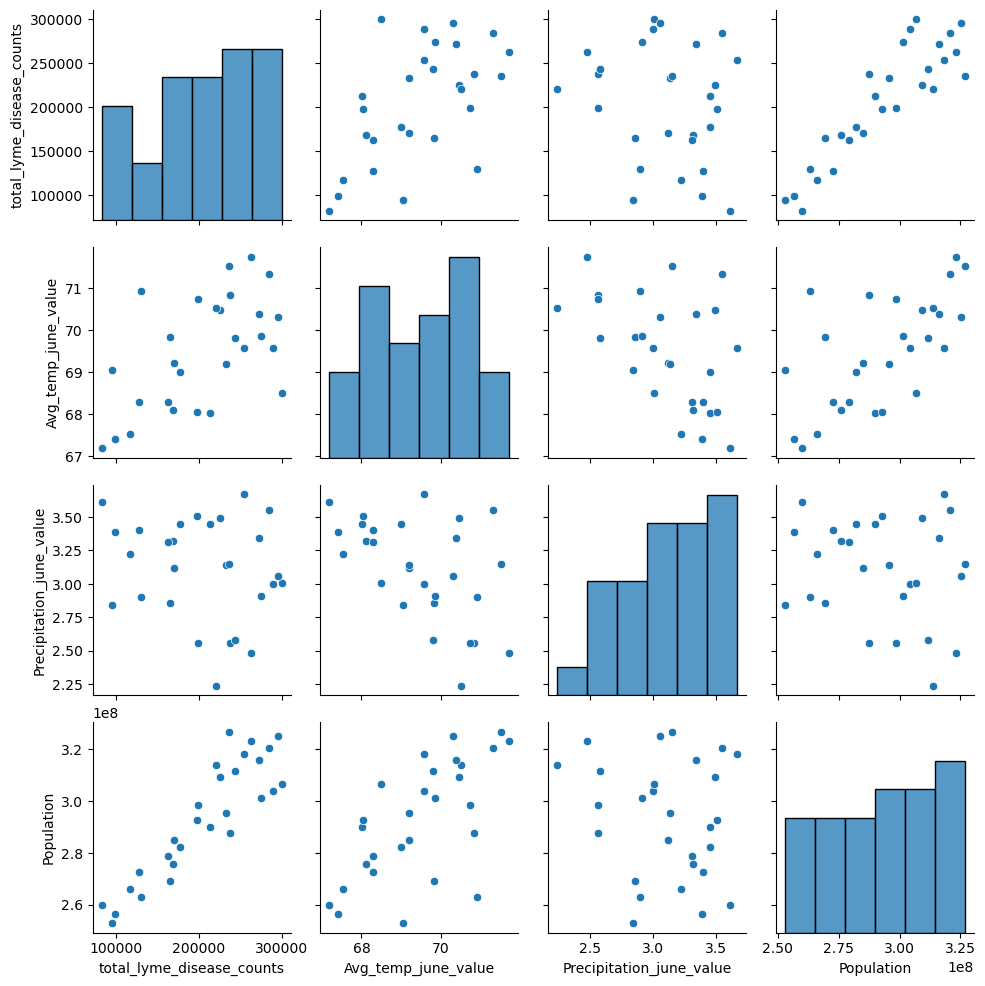

In [5]:
# Pairplot for key variables
sns.pairplot(df, 
             vars=["total_lyme_disease_counts", "Avg_temp_june_value", 
                   "Precipitation_june_value", "Population"])
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target variable
X = df[["Avg_temp_june_value", "Min_temp_june_value", "Precipitation_june_value", "Avg_cooling_degree_days_june"]]
y = df["total_lyme_disease_counts"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (optional, depending on the model)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train_scaled)
y_pred_test = rf_model.predict(X_test_scaled)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Test R2 Score:", test_r2)


Train RMSE: 21978.799848685932
Test RMSE: 55811.91926540627
Test R2 Score: -0.12587842411459493


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


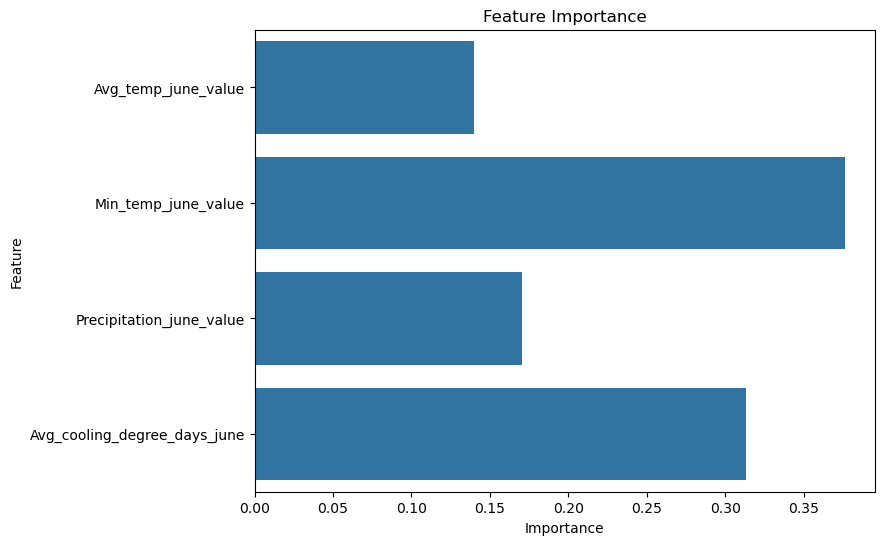

In [13]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

# Visualize feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [9]:
# Example of making predictions with new data
new_data = pd.DataFrame({
    "Avg_temp_june_value": [70.0],
    "Precipitation_june_value": [3.0],
    "Population": [270000000]
})

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict total Lyme disease counts
predicted_counts = rf_model.predict(new_data_scaled)
print("Predicted total Lyme disease counts:", predicted_counts)


Predicted total Lyme disease counts: [154573.5876003]
